In [2]:
import datetime
from dateutil.relativedelta import relativedelta
import time
import json
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from castlib.cast import Cast
from castlib.reporter import Reporter
from castlib.prop import Prop
from castlib.event import Event
from castlib.stock import StockGrant
from castlib.util import format_currency

import pandas as pd
import yfinance as yf

First day under 0: 2022-08-01


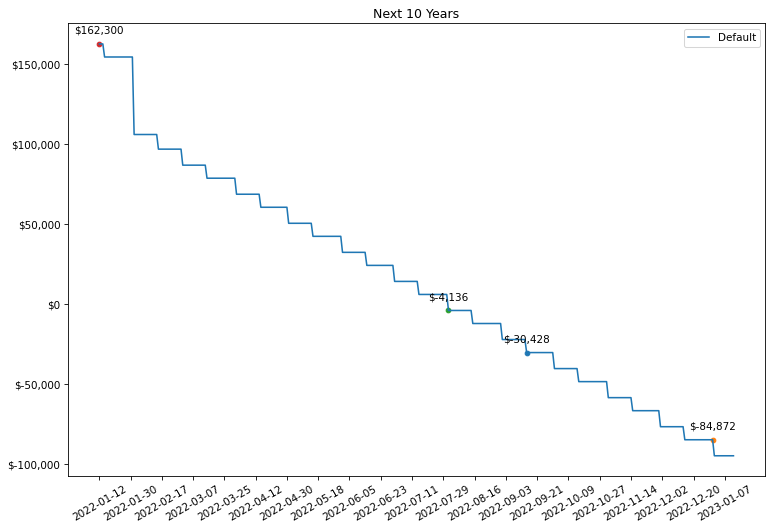

In [29]:
# config
d = datetime.date

accounts = [
    162300
]

total_cash = sum(accounts)
beta_test = Event(name="Beta", amount=-1000, date=d(2022, 2, 15))

total_gleb_hours = 120
Gleb = Prop([Event(name="Gleb", amount=-total_gleb_hours * 320, date=d(2022, 2, 1))], "Gleb")

c = (Cast(balance=total_cash, start=d.today())
     .end_after(years=1)
     .report_with(Reporter)

     .add_event(Event(name="Payroll", amount=-16288/2, date=d(2022, 1, 1)).monthly)
     .add_event(Event(name="Payroll", amount=-16288/2, date=d(2022, 1, 15)).monthly)
     
     .add_event(Event(name="Softwar", amount=-1860, date=d(2022, 1, 1)).monthly)
     .add_event(beta_test)
     .add_event(Gleb.events)
)

c.save(f"/Users/jacobsansbury/Casts/pluto-{d.today()}.json")
print(f"First day under 0: {str(c.first_day_under(0))}")
c.report.running_balance(title="Next 10 Years", mark_today=True, annotate=[d(2022, 9, 15), d(2022, 12, 31), c.first_day_under(0)], props=[])